   # MVP Regression - Med Billian

In [3]:
from bs4 import BeautifulSoup, NavigableString
from string import ascii_lowercase
import pandas as pd
import requests
import time, os
import re

# 1st DataSet - Get Page Links

In [10]:
dictActivePlayerLinks = {}
url = 'https://www.basketball-reference.com{}'

for c in ascii_lowercase:
    masterPagePlayers = requests.get('https://www.basketball-reference.com/players/{}'.format(c)).text
    soup = BeautifulSoup(masterPagePlayers, 'html5lib')
    #for player in soup.find('div', id='div_players').findAll('th',{'data-stat':'player'}):
    for player in soup.find('div', id='div_players').findAll(['strong']):
        if (not isinstance(player, NavigableString)):
            link = (player.next.get('href'))
            if link is not None:
                dictActivePlayerLinks[player.next.text] = url.format(link)

{'Álex Abrines': 'https://www.basketball-reference.com/players/a/abrinal01.html',
 'Precious Achiuwa': 'https://www.basketball-reference.com/players/a/achiupr01.html',
 'Quincy Acy': 'https://www.basketball-reference.com/players/a/acyqu01.html',
 'Jaylen Adams': 'https://www.basketball-reference.com/players/a/adamsja01.html',
 'Steven Adams': 'https://www.basketball-reference.com/players/a/adamsst01.html',
 'Bam Adebayo': 'https://www.basketball-reference.com/players/a/adebaba01.html',
 'Deng Adel': 'https://www.basketball-reference.com/players/a/adelde01.html',
 'DeVaughn Akoon-Purcell': 'https://www.basketball-reference.com/players/a/akoonde01.html',
 'Kyle Alexander': 'https://www.basketball-reference.com/players/a/alexaky01.html',
 'Ty-Shon Alexander': 'https://www.basketball-reference.com/players/a/alexaty01.html',
 'Nickeil Alexander-Walker': 'https://www.basketball-reference.com/players/a/alexani01.html',
 'Rawle Alkins': 'https://www.basketball-reference.com/players/a/alkinra01

Get 1st Dataset and Store in Local Database (https://www.basketball-reference.com/)

In [70]:
# Save 1st Dataset to Database - Table Stats
from sqlalchemy import create_engine
engine = create_engine("sqlite:///NBA_Players.db")

for key in dictActivePlayerLinks:
    playerPage = requests.get(dictActivePlayerLinks[key]).text
    soupPlayer = BeautifulSoup(playerPage, 'html5lib')
    time.sleep(2)
    
    pos = soupPlayer.find(text=re.compile('Position:')).next.replace('\n','').replace('▪','').strip()
    pos

    y = soupPlayer.find(text='Experience:').next.replace('\xa0','').split(' ')[0]
    y

    g = soupPlayer.find('span',{'data-tip':'Games'}).findNext('p').findNext('p').text
    g

    pts = soupPlayer.find('span',{'data-tip':'Points'}).findNext('p').findNext('p').text
    pts

    trb = soupPlayer.find('span',{'data-tip':'Total Rebounds'}).findNext('p').findNext('p').text
    trb

    ast = soupPlayer.find('span',{'data-tip':'Assists'}).findNext('p').findNext('p').text
    ast

    fgp = soupPlayer.find('span',{'data-tip':'Field Goal Percentage'}).findNext('p').findNext('p').text
    fgp

    fg3p = soupPlayer.find('span',{'data-tip':'3-Point Field Goal Percentage'}).findNext('p').findNext('p').text
    fg3p

    ftp = soupPlayer.find('span',{'data-tip':'Free Throw Percentage'}).findNext('p').findNext('p').text
    ftp

    efgp = soupPlayer.find('span',{'data-tip':re.compile('Effective Field Goal Percentage')}).findNext('p').findNext('p').text
    efgp

    per = soupPlayer.find('span',{'data-tip':re.compile('Player Efficiency Rating')}).findNext('p').findNext('p').text
    per

    ws = soupPlayer.find('span',{'data-tip':re.compile('Win Shares')}).findNext('p').findNext('p').text
    ws

    height = soupPlayer.find('span',{'itemprop':'weight'}).next.next.replace('\xa0','').replace(')','').replace('(','').replace(' ','').split(',')[0]
    weight = soupPlayer.find('span',{'itemprop':'weight'}).next.next.replace('\xa0','').replace(')','').replace('(','').replace(' ','').split(',')[1]

    d = {'pos':pos,'height':height,'weight':weight,'y':y,'g':g,'pts':pts,'trb':trb,'ast':ast,'fgp':fgp,'fg3p':fg3p,'ftp':ftp,'efgp':efgp,'per':per,'ws':ws}
    playerStats = pd.Series(data=d, index=['pos','height','weight','y','g','pts','trb','ast','fgp','fg3p','ftp','efgp','per','ws'])
    
    engine.execute('INSERT INTO "Stats"'
                   '(Name,Position,Height,Weight,Years,Games,Points,TotalRebounds,Assists,FieldGoalPercent,FieldGoal3Percent,FreeThrowPercent,EffectiveFieldGoalPercent,PlayerEfficiencyRating,WinShares)'
                   'VALUES ('  
                   +'"'+ key + '",'
                   +'"'+ pos + '",'
                   +'"'+ height + '",'
                   +'"'+ weight + '",'
                   +'"'+ y + '",'
                   +'"'+ g + '",'
                   +'"'+ pts + '",'
                   +'"'+ trb + '",'
                   +'"'+ ast + '",'
                   +'"'+ fgp + '",'
                   +'"'+ fg3p + '",'
                   +'"'+ ftp + '",'
                   +'"'+ efgp + '",'
                   +'"'+ per + '",'
                   +'"'+ ws + '")')


Retrieve data from Database

In [27]:
from sqlalchemy import create_engine
import pandas as pd
# Get data from database
engine = create_engine("sqlite:///NBA_Players.db")
engine.table_names()
dfActivePlayers = pd.read_sql('SELECT * FROM Stats;', engine)
dfActivePlayers

,Name,Position,Height,Weight,Years,Games,Points,TotalRebounds,Assists,FieldGoalPercent,FieldGoal3Percent,FreeThrowPercent,EffectiveFieldGoalPercent,PlayerEfficiencyRating,WinShares
0,Álex Abrines,Shooting Guard,198cm,90kg,3,174,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0
1,Precious Achiuwa,Power Forward,203cm,102kg,1,61,5.0,3.4,0.5,54.4,0.0,50.9,54.4,14.2,1.3
2,Quincy Acy,Power Forward and Small Forward,201cm,108kg,7,337,4.9,3.5,0.6,44.4,35.0,75.9,51.3,11.2,8.7
3,Jaylen Adams,Point Guard,183cm,102kg,3,41,2.7,1.5,1.6,33.1,32.9,77.8,43.6,7.0,0.0
4,Steven Adams,Center,211cm,120kg,8,588,9.6,7.7,1.2,59.1,7.7,54.8,59.1,17.0,49.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,Trae Young,Point Guard,185cm,81kg,3,204,24.1,3.9,8.9,43.1,34.3,86.1,49.9,21.0,16.3
722,Cody Zeller,Center,211cm,108kg,8,467,8.7,6.0,1.4,51.8,22.7,72.9,52.4,16.2,31.0
723,Tyler Zeller,Center,213cm,114kg,8,414,6.9,4.4,0.9,50.8,28.6,76.4,51.1,14.9,17.1
724,Ante Žižić,Center,208cm,120kg,3,113,6.0,3.9,0.6,58.1,-,71.1,58.1,17.4,3.5


In [28]:
dfActivePlayers['Height'] = dfActivePlayers['Height'].str.replace('cm','')
dfActivePlayers['Weight'] = dfActivePlayers['Weight'].str.replace('kg','')
dfActivePlayers['Height'] = dfActivePlayers['Height'].apply(pd.to_numeric)
dfActivePlayers['Weight'] = dfActivePlayers['Weight'].apply(pd.to_numeric)
dfActivePlayers['Years'] = dfActivePlayers['Years'].apply(pd.to_numeric)
dfActivePlayers['Games'] = dfActivePlayers['Games'].apply(pd.to_numeric)
dfActivePlayers['Points'] = dfActivePlayers['Points'].apply(pd.to_numeric)
dfActivePlayers['TotalRebounds'] = dfActivePlayers['TotalRebounds'].apply(pd.to_numeric)
dfActivePlayers['Assists'] = dfActivePlayers['Assists'].apply(pd.to_numeric)
dfActivePlayers['FieldGoalPercent'] = dfActivePlayers['FieldGoalPercent'].str.replace('-','')
dfActivePlayers['FieldGoalPercent'] = dfActivePlayers['FieldGoalPercent'].apply(pd.to_numeric)
dfActivePlayers['FieldGoal3Percent'] = dfActivePlayers['FieldGoal3Percent'].str.replace('-','')
dfActivePlayers['FieldGoal3Percent'] = dfActivePlayers['FieldGoal3Percent'].apply(pd.to_numeric)
dfActivePlayers['FreeThrowPercent'] = dfActivePlayers['FreeThrowPercent'].str.replace('-','')
dfActivePlayers['FreeThrowPercent'] = dfActivePlayers['FreeThrowPercent'].apply(pd.to_numeric)
dfActivePlayers['EffectiveFieldGoalPercent'] = dfActivePlayers['EffectiveFieldGoalPercent'].str.replace('-','')
dfActivePlayers['EffectiveFieldGoalPercent'] = dfActivePlayers['EffectiveFieldGoalPercent'].apply(pd.to_numeric)
dfActivePlayers['PlayerEfficiencyRating'] = dfActivePlayers['PlayerEfficiencyRating'].str.replace('-','')
dfActivePlayers['PlayerEfficiencyRating'] = dfActivePlayers['PlayerEfficiencyRating'].apply(pd.to_numeric)
dfActivePlayers['WinShares'] = dfActivePlayers['WinShares'].str.replace('-','')
dfActivePlayers['WinShares'] = dfActivePlayers['WinShares'].apply(pd.to_numeric)
dfActivePlayers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       726 non-null    object 
 1   Position                   726 non-null    object 
 2   Height                     726 non-null    int64  
 3   Weight                     726 non-null    int64  
 4   Years                      726 non-null    int64  
 5   Games                      726 non-null    int64  
 6   Points                     726 non-null    float64
 7   TotalRebounds              726 non-null    float64
 8   Assists                    726 non-null    float64
 9   FieldGoalPercent           724 non-null    float64
 10  FieldGoal3Percent          703 non-null    float64
 11  FreeThrowPercent           699 non-null    float64
 12  EffectiveFieldGoalPercent  724 non-null    float64
 13  PlayerEfficiencyRating     726 non-null    float64

Get/Scrape 2nd DataSet from different webpage

In [52]:
import requests
from bs4 import BeautifulSoup, NavigableString

dictActivePlayerSalary = {}
for c in list(range(1, 13)):
    url = 'http://www.espn.com/nba/salaries/_/page/{}/seasontype/1'.format(c)
    pageSalary = requests.get(url).text
    soup2 = BeautifulSoup(pageSalary, 'html5lib')
    for player in soup2.find('div', id='my-players-table').findAll('tr'):
        if(player.findNext('td').findNext('td').text.split(',')[0] != 'NAME'):
            dictActivePlayerSalary[player.findNext('td').findNext('td').text.split(',')[0]] = player.findNext('td').findNext('td').findNext('td').findNext('td').text.replace('$','')

dictActivePlayerSalary

{'Stephen Curry': '45,780,966',
 'James Harden': '44,310,840',
 'John Wall': '44,310,840',
 'Russell Westbrook': '44,211,146',
 'Kevin Durant': '42,018,900',
 'LeBron James': '41,180,544',
 'Giannis Antetokounmpo': '39,344,970',
 'Damian Lillard': '39,344,900',
 'Paul George': '39,344,900',
 'Klay Thompson': '37,980,720',
 'Kemba Walker': '36,016,200',
 'Jimmy Butler': '36,016,200',
 'Kawhi Leonard': '36,016,200',
 'Tobias Harris': '35,995,950',
 'Khris Middleton': '35,500,000',
 'Anthony Davis': '35,361,360',
 'Rudy Gobert': '35,344,828',
 'Kyrie Irving': '35,328,700',
 'Bradley Beal': '33,724,200',
 'Pascal Siakam': '33,003,936',
 'Ben Simmons': '33,003,936',
 'Jrue Holiday': '32,413,333',
 'Devin Booker': '31,650,600',
 'Karl-Anthony Towns': '31,650,600',
 'Kristaps Porzingis': '31,650,600',
 'Joel Embiid': '31,579,390',
 'Andrew Wiggins': '31,579,390',
 'Nikola Jokic': '31,579,390',
 'Kevin Love': '31,258,256',
 'CJ McCollum': '30,864,198',
 "D'Angelo Russell": '30,013,500',
 'Chri

In [55]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///NBA_Players.db")


for key in dictActivePlayerSalary:
    engine.execute('INSERT INTO "Salary"'
                  '(Name,Salary)'
                  'VALUES ('  
                  +'"'+ key + '",'
                  +'"'+ dictActivePlayerSalary[key] + '")')

In [69]:
dictActivePlayerSalary2 = {}
url = 'https://hoopshype.com/salaries/players/'
pageSalary = requests.get(url).text
soup3 = BeautifulSoup(pageSalary, 'html5lib')
for player in soup3.find(class_='hh-salaries-ranking-table hh-salaries-table-sortable responsive').findAll('tr'):
    dictActivePlayerSalary2[player.find(class_ = 'name').text.strip()] = player.find(class_ = 'hh-salaries-sorted').text.strip()
    
dictActivePlayerSalary2 

{'Player': '2021/22',
 'Stephen Curry': '$45,780,966',
 'James Harden': '$44,310,840',
 'John Wall': '$44,310,840',
 'Russell Westbrook': '$44,211,146',
 'LeBron James': '$41,180,544',
 'Kevin Durant': '$40,918,900',
 'Paul George': '$39,344,970',
 'Kawhi Leonard': '$39,344,900',
 'Giannis Antetokounmpo': '$39,344,900',
 'Damian Lillard': '$39,344,900',
 'Klay Thompson': '$37,980,720',
 'Jimmy Butler': '$36,016,200',
 'Tobias Harris': '$35,995,950',
 'Khris Middleton': '$35,500,000',
 'Anthony Davis': '$35,361,360',
 'Kyrie Irving': '$35,053,700',
 'Kemba Walker': '$34,967,442',
 'Rudy Gobert': '$34,844,000',
 'Bradley Beal': '$34,502,129',
 'Ben Simmons': '$33,003,936',
 'Pascal Siakam': '$33,003,936',
 'Jrue Holiday': '$32,431,333',
 'Blake Griffin': '$32,405,817',
 'Kristaps Porzingis': '$31,650,600',
 'Karl-Anthony Towns': '$31,650,600',
 'Devin Booker': '$31,650,600',
 'Nikola Jokic': '$31,579,390',
 'Andrew Wiggins': '$31,579,390',
 'Joel Embiid': '$31,579,390',
 'Kevin Love': '$

In [72]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///NBA_Players.db")

for key in dictActivePlayerSalary2:
    engine.execute('INSERT INTO "Salaries"'
                  '(Name,Salary)'
                  'VALUES ('  
                  +'"'+ key + '",'
                  +'"'+ dictActivePlayerSalary2[key] + '")')

In [80]:
dictActivePlayerSalary3 = {}
url = 'https://hoopshype.com/salaries/players/2020-2021/'
pageSalary = requests.get(url).text
soup4 = BeautifulSoup(pageSalary, 'html5lib')
for player in soup4.find(class_='hh-salaries-ranking-table hh-salaries-table-sortable responsive').findAll('tr'):
    dictActivePlayerSalary3[player.find(class_ = 'name').text.strip()] = player.find(class_ = 'name').nextSibling.nextSibling.text.strip()

dictActivePlayerSalary3

{'Player': '2020/21',
 'Stephen Curry': '$43,006,362',
 'Chris Paul': '$41,358,814',
 'Russell Westbrook': '$41,358,814',
 'James Harden': '$41,254,920',
 'John Wall': '$41,254,920',
 'Kevin Durant': '$40,108,950',
 'LeBron James': '$39,219,566',
 'Paul George': '$35,450,412',
 'Klay Thompson': '$35,361,360',
 'Mike Conley': '$34,502,132',
 'Kemba Walker': '$34,379,100',
 'Kawhi Leonard': '$34,379,100',
 'Jimmy Butler': '$34,379,100',
 'Tobias Harris': '$34,358,850',
 'Blake Griffin': '$33,900,241',
 'Kyrie Irving': '$33,722,850',
 'Khris Middleton': '$33,051,724',
 'Anthony Davis': '$32,742,000',
 'Damian Lillard': '$31,626,953',
 'Kevin Love': '$31,258,256',
 'Ben Simmons': '$30,559,200',
 'Pascal Siakam': '$30,559,200',
 'Kyle Lowry': '$30,500,000',
 'Steven Adams': '$29,592,695',
 'Nikola Jokic': '$29,542,010',
 'Andrew Wiggins': '$29,542,010',
 'Joel Embiid': '$29,542,010',
 'Kristaps Porzingis': '$29,467,800',
 'Karl-Anthony Towns': '$29,467,800',
 'Devin Booker': '$29,467,800',


In [81]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///NBA_Players.db")

for key in dictActivePlayerSalary3:
    engine.execute('INSERT INTO "Salaries2"'
                  '(Name,Salary)'
                  'VALUES ('  
                  +'"'+ key + '",'
                  +'"'+ dictActivePlayerSalary3[key] + '")')

# Retrieve Joined Tables/Datasets from Local Database

In [5]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine("sqlite:///NBA_Players.db")
dfActivePlayersSalary = pd.read_sql('select DISTINCT S.*, Sl.Salary from Stats S join PlayerSalary Sl on Sl.Name = S.Name', engine)
dfActivePlayersSalary

,Name,Position,Height,Weight,Years,Games,Points,TotalRebounds,Assists,FieldGoalPercent,FieldGoal3Percent,FreeThrowPercent,EffectiveFieldGoalPercent,PlayerEfficiencyRating,WinShares,Salary
0,Aaron Gordon,Power Forward and Small Forward,203cm,106kg,7,453,12.7,6.3,2.5,45.0,32.1,69.5,50.1,15.2,23.6,"16,409,091"
1,Aaron Holiday,Point Guard,183cm,83kg,3,182,7.7,1.7,2.4,40.3,37.2,83.2,48.1,10.9,3.2,"3,980,551"
2,Aaron Nesmith,Small Forward,196cm,97kg,1,46,4.7,2.8,0.5,43.8,37.0,78.6,55.1,9.4,1.1,"3,631,200"
3,Abdel Nader,Small Forward,196cm,102kg,4,188,4.7,1.9,0.5,43.2,36.0,72.5,51.3,9.6,2.8,"2,000,000"
4,Adam Mokoka,Shooting Guard and Small Forward,193cm,86kg,2,25,1.9,0.6,0.4,40.4,28.0,40.0,47.9,6.2,0.0,"$449,115"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Zach LaVine,Shooting Guard and Point Guard,196cm,90kg,7,411,19.1,3.8,3.8,45.8,38.5,82.4,52.6,16.6,17.8,"19,500,000"
516,Zeke Nnaji,Power Forward,206cm,108kg,1,42,3.2,1.5,0.2,48.1,40.7,80.0,59.6,11.3,0.9,"2,498,760"
517,Zhaire Smith,Shooting Guard and Small Forward,190cm,92kg,2,13,3.7,1.2,0.9,37.8,31.6,66.7,44.4,7.6,0.0,"$1,068,200"
518,Zion Williamson,Power Forward,201cm,128kg,2,85,25.7,7.0,3.2,60.4,33.3,68.3,61.0,26.3,10.6,"10,733,400"


In [6]:
dfActivePlayersSalary['Height'] = dfActivePlayersSalary['Height'].str.replace('cm','')
dfActivePlayersSalary['Weight'] = dfActivePlayersSalary['Weight'].str.replace('kg','')
dfActivePlayersSalary['Height'] = dfActivePlayersSalary['Height'].apply(pd.to_numeric)
dfActivePlayersSalary['Weight'] = dfActivePlayersSalary['Weight'].apply(pd.to_numeric)
dfActivePlayersSalary['Years'] = dfActivePlayersSalary['Years'].apply(pd.to_numeric)
dfActivePlayersSalary['Games'] = dfActivePlayersSalary['Games'].apply(pd.to_numeric)
dfActivePlayersSalary['Points'] = dfActivePlayersSalary['Points'].apply(pd.to_numeric)
dfActivePlayersSalary['TotalRebounds'] = dfActivePlayersSalary['TotalRebounds'].apply(pd.to_numeric)
dfActivePlayersSalary['Assists'] = dfActivePlayersSalary['Assists'].apply(pd.to_numeric)
dfActivePlayersSalary['FieldGoalPercent'] = dfActivePlayersSalary['FieldGoalPercent'].str.replace('-','')
dfActivePlayersSalary['FieldGoalPercent'] = dfActivePlayersSalary['FieldGoalPercent'].apply(pd.to_numeric)
dfActivePlayersSalary['FieldGoal3Percent'] = dfActivePlayersSalary['FieldGoal3Percent'].str.replace('-','')
dfActivePlayersSalary['FieldGoal3Percent'] = dfActivePlayersSalary['FieldGoal3Percent'].apply(pd.to_numeric)
dfActivePlayersSalary['FreeThrowPercent'] = dfActivePlayersSalary['FreeThrowPercent'].str.replace('-','')
dfActivePlayersSalary['FreeThrowPercent'] = dfActivePlayersSalary['FreeThrowPercent'].apply(pd.to_numeric)
dfActivePlayersSalary['EffectiveFieldGoalPercent'] = dfActivePlayersSalary['EffectiveFieldGoalPercent'].str.replace('-','')
dfActivePlayersSalary['EffectiveFieldGoalPercent'] = dfActivePlayersSalary['EffectiveFieldGoalPercent'].apply(pd.to_numeric)
dfActivePlayersSalary['PlayerEfficiencyRating'] = dfActivePlayersSalary['PlayerEfficiencyRating'].str.replace('-','')
dfActivePlayersSalary['PlayerEfficiencyRating'] = dfActivePlayersSalary['PlayerEfficiencyRating'].apply(pd.to_numeric)
dfActivePlayersSalary['WinShares'] = dfActivePlayersSalary['WinShares'].str.replace('-','')
dfActivePlayersSalary['WinShares'] = dfActivePlayersSalary['WinShares'].apply(pd.to_numeric)
dfActivePlayersSalary['Salary'] = dfActivePlayersSalary['Salary'].str.replace('$','').str.replace(',','')
dfActivePlayersSalary['Salary'] = dfActivePlayersSalary['Salary'].apply(pd.to_numeric)
dfActivePlayersSalary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       520 non-null    object 
 1   Position                   520 non-null    object 
 2   Height                     520 non-null    int64  
 3   Weight                     520 non-null    int64  
 4   Years                      520 non-null    int64  
 5   Games                      520 non-null    int64  
 6   Points                     520 non-null    float64
 7   TotalRebounds              520 non-null    float64
 8   Assists                    520 non-null    float64
 9   FieldGoalPercent           519 non-null    float64
 10  FieldGoal3Percent          507 non-null    float64
 11  FreeThrowPercent           511 non-null    float64
 12  EffectiveFieldGoalPercent  519 non-null    float64
 13  PlayerEfficiencyRating     520 non-null    float64

C:\Users\medch\AppData\Local\Temp/ipykernel_17876/2174064463.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfActivePlayersSalary['Salary'] = dfActivePlayersSalary['Salary'].str.replace('$','').str.replace(',','')


In [7]:
#Drop NULLS
dfActivePlayersSalary.dropna(inplace=True)

# Create Model #1

In [9]:
import statsmodels.api as sm

y = dfActivePlayersSalary.loc[:,'Salary'].astype(float)
X = dfActivePlayersSalary.drop(columns = ['Salary','Position','Name']).astype(float)
X = sm.add_constant(X)
model = sm.OLS(y,X,data=dfActivePlayersSalary)
playerSalaryModel1 = model.fit()
playerSalaryModel1.summary()

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     59.52
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.22e-91
Time:                        21:26:26   Log-Likelihood:                -8487.8
No. Observations:                 499   AIC:                         1.700e+04
Df Residuals:                     485   BIC:                         1.706e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.771e+07      1e+07     -3.754      0.000   -5.74e+07    -1.8e+07
Height                     1.857e+05   5.45e+04      3.409      0.001    7.87e+04    2.93e+05
Weight                    -4.445e+04   4.14e+04     -1.075      0.283   -1.26e+05    3.68e+04
Years                      -6.29e+05   3.26e+05     -1.928      0.054   -1.27e+06     1.2e+04
Games                      3468.2431   5217.115      0.665      0.507   -6782.696    1.37e+04
Points                     9.329e+05   1.09e+05      8.590      0.000    7.19e+05    1.15e+06
TotalRebounds             -4.928e+05   2.41e+05     -2.044      0.041   -9.67e+05   -1.92e+04
Assists                    9.242e+05   2.85e+05      3.242      0.001    3.64e+05    1.48e+06
FieldGoalPercent          -1.309e+05   1.21e+05     -1.082      0.280   -3.69e+05    1.07e+05
FieldGoal3Percent         -5.761e+04   3.95e+04     -1.460      0.145   -1.35e+05    1.99e+04
FreeThrowPercent            4.07e+04   3.13e+04      1.299      0.194   -2.08e+04    1.02e+05
EffectiveFieldGoalPercent  1.442e+05   1.12e+05      1.286      0.199   -7.62e+04    3.65e+05
PlayerEfficiencyRating     1.306e+05   1.53e+05      0.855      0.393   -1.69e+05    4.31e+05
WinShares                  1.235e+05   2.24e+04      5.520      0.000    7.96e+04    1.68e+05
==============================================================================
Omnibus:                       29.165   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.084
Skew:                          -0.076   Prob(JB):                     1.37e-21
Kurtosis:                       5.144   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\statsmodels\graphics\regressionplots.py:739: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()


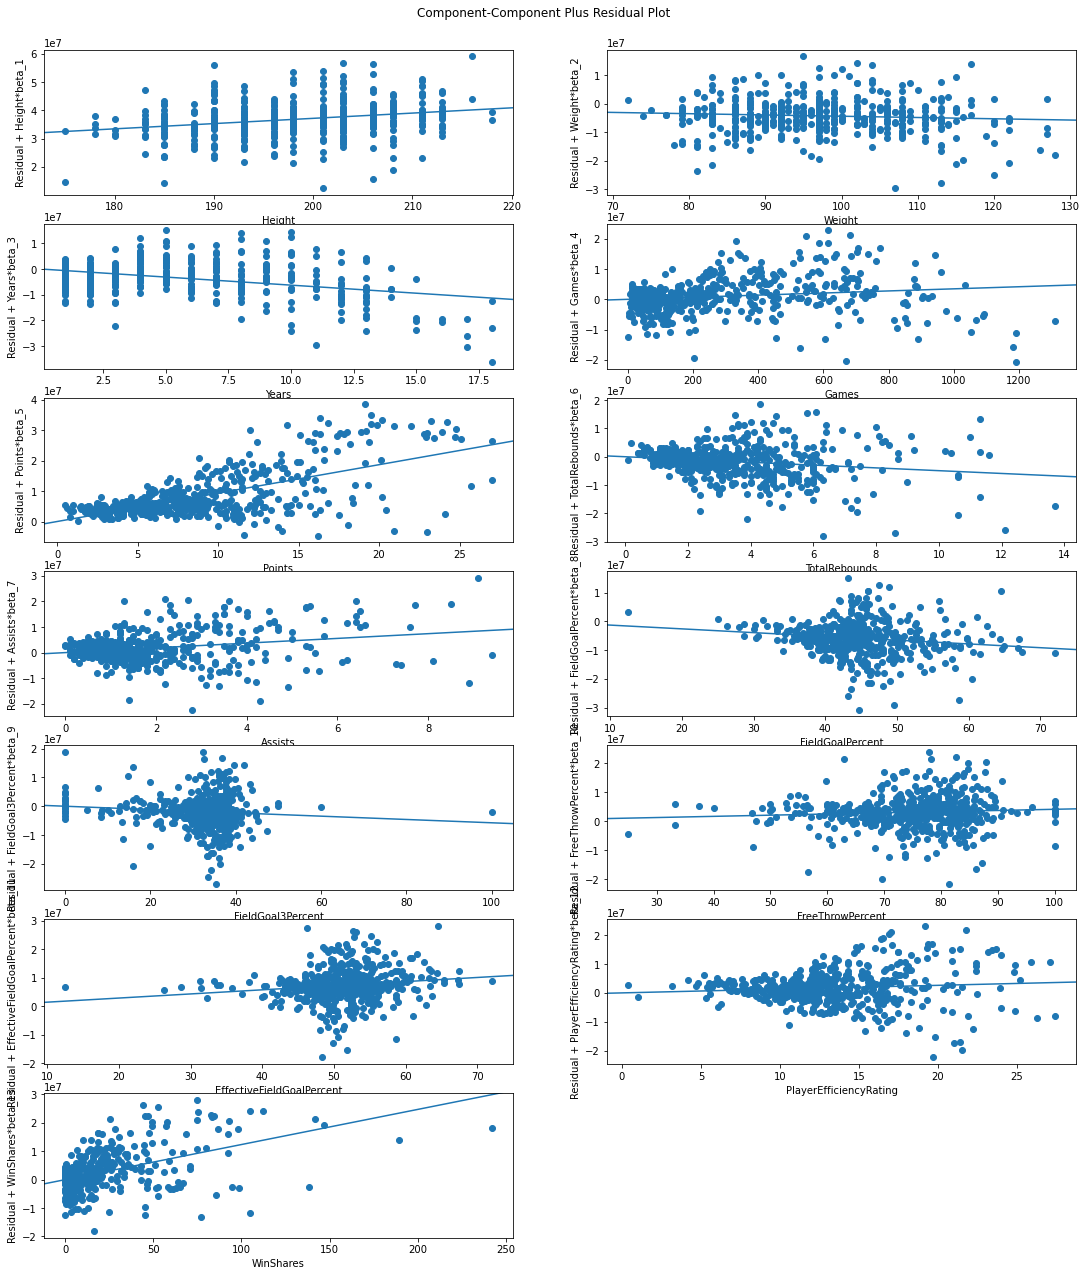

In [10]:
#fig = sm.graphics.plot_ccpr(playerSalaryModel1,'Points')
#pd.plotting.scatter_matrix(dfActivePlayersSalary.drop(columns = ['Position','Height','Weight','Games','TotalRebounds','FieldGoalPercent','FieldGoal3Percent','FreeThrowPercent','EffectiveFieldGoalPercent','PlayerEfficiencyRating']), alpha=0.2)
fig = sm.graphics.plot_ccpr_grid(playerSalaryModel1)
fig.set_size_inches(18.5, 20)


# Create Model #2

In [11]:
y = dfActivePlayersSalary.loc[:,'Salary'].astype(float)
X = dfActivePlayersSalary.drop(columns = ['Name','Salary','Position','Height','Weight','TotalRebounds','FieldGoalPercent','FieldGoal3Percent','FreeThrowPercent','EffectiveFieldGoalPercent','Years','PlayerEfficiencyRating']).astype(float)
X = sm.add_constant(X)
model = sm.OLS(y,X,data=dfActivePlayersSalary)
playerSalaryModel2 = model.fit()
playerSalaryModel2.summary()

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     184.1
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.88e-96
Time:                        21:27:55   Log-Likelihood:                -8498.0
No. Observations:                 499   AIC:                         1.701e+04
Df Residuals:                     494   BIC:                         1.703e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.606e+06   6.04e+05     -4.317      0.000   -3.79e+06   -1.42e+06
Games      -6946.6909   1865.876     -3.723      0.000   -1.06e+04   -3280.659
Points      9.534e+05   7.85e+04     12.151      0.000    7.99e+05    1.11e+06
Assists     6.294e+05    2.3e+05      2.732      0.007    1.77e+05    1.08e+06
WinShares    1.37e+05   2.03e+04      6.752      0.000    9.72e+04    1.77e+05
==============================================================================
Omnibus:                       35.436   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.251
Skew:                          -0.120   Prob(JB):                     4.27e-30
Kurtosis:                       5.539   Cond. No.                         893.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

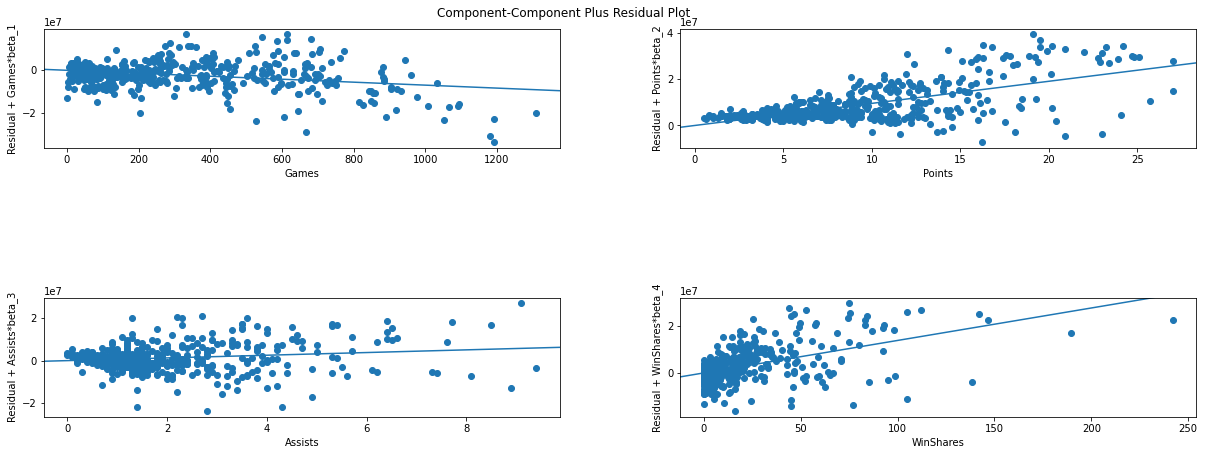

In [185]:
fig = sm.graphics.plot_ccpr_grid(playerSalaryModel2)
fig.set_size_inches(18.5, 10)

<AxesSubplot:ylabel='cooks_d'>

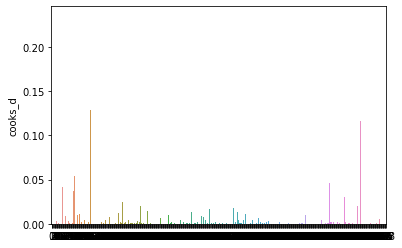

In [12]:
# Check for Outliers - Influential Points
import seaborn as sns

influence = playerSalaryModel2.get_influence()
influence_frame = influence.summary_frame().reset_index()
influence_frame

sns.barplot(y='cooks_d',
            x=influence_frame.index,
            data = influence_frame)

Text(0.5, 0, 'Prediction')

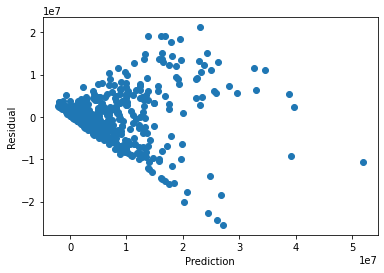

In [13]:
# Check for the normality of Residual
# Residual Plot
# Heteroskedasticity - There's Unequal Variance of Error
# Should transform target?
import matplotlib.pyplot as plt
fig = plt.scatter(playerSalaryModel2.predict(), playerSalaryModel2.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')

#QQ Plot

In [44]:
# Check for Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = playerSalaryModel2.model.exog
vif = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif

[4.9632482030518865,
 3.5453778013604937,
 2.3565367260243417,
 1.8662399802322136,
 4.119967937875797]

# Create Model #3

In [39]:
y = dfActivePlayersSalary.loc[:,'Salary'].astype(float)
X = dfActivePlayersSalary.drop(columns = ['Name','Salary','Position','Height','Weight','TotalRebounds','FieldGoalPercent','FieldGoal3Percent','FreeThrowPercent','EffectiveFieldGoalPercent','PlayerEfficiencyRating','Assists','WinShares','Games','Years']).astype(float)
X = sm.add_constant(X)
model = sm.OLS(y,X,data=dfActivePlayersSalary)
playerSalaryModel3 = model.fit()
playerSalaryModel3.summary()

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     600.8
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           1.43e-87
Time:                        18:05:37   Log-Likelihood:                -8528.0
No. Observations:                 499   AIC:                         1.706e+04
Df Residuals:                     497   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.359e+06   5.61e+05     -7.774      0.000   -5.46e+06   -3.26e+06
Points      1.326e+06   5.41e+04     24.512      0.000    1.22e+06    1.43e+06
==============================================================================
Omnibus:                       27.420   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.104
Skew:                           0.141   Prob(JB):                     4.03e-18
Kurtosis:                       4.942   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

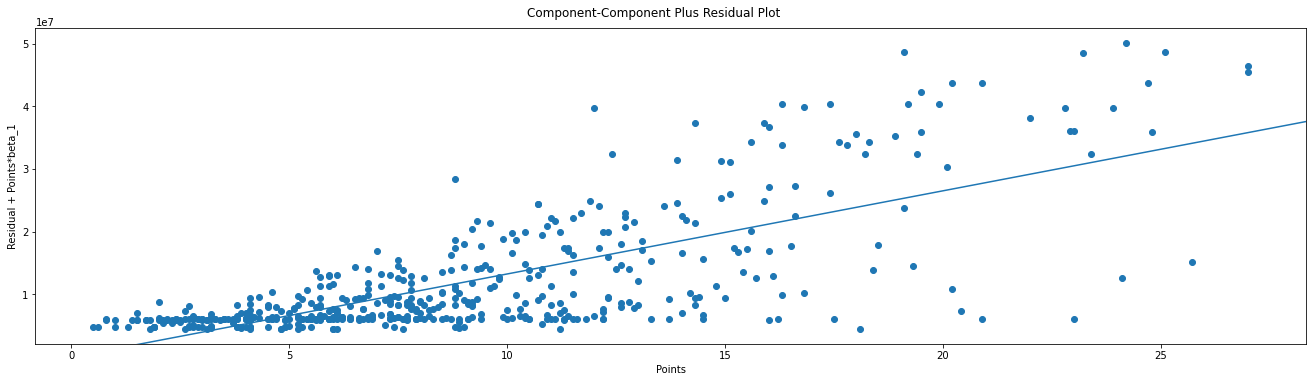

In [40]:
fig = sm.graphics.plot_ccpr_grid(playerSalaryModel3)
fig.set_size_inches(18.5, 10)

Text(0.5, 0, 'Prediction')

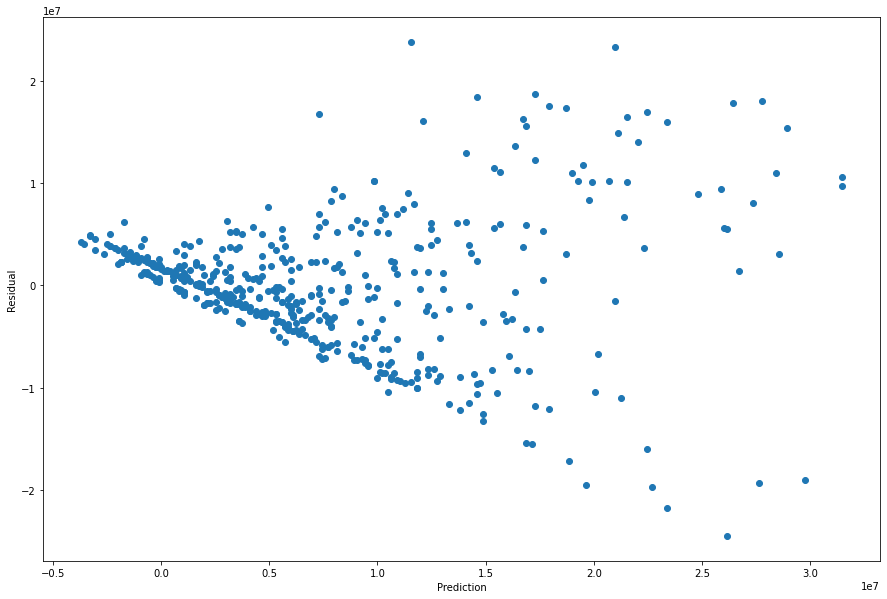

In [41]:
# See the normality of Residual
#Residual Plot
import matplotlib.pyplot as plt
fig = plt.scatter(playerSalaryModel3.predict(), playerSalaryModel3.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')


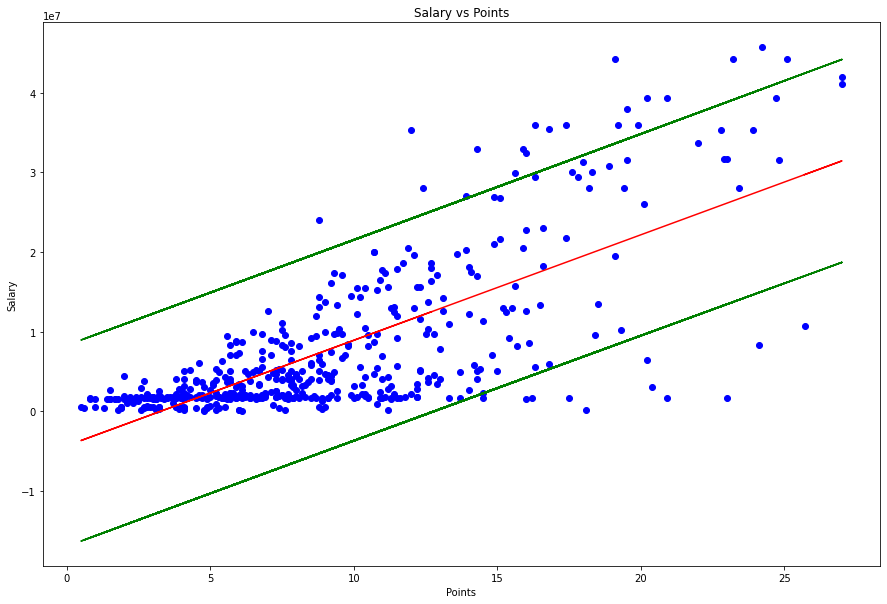

In [42]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(playerSalaryModel3)

plt.scatter(X['Points'], y, color = "blue")
plt.plot(X['Points'], playerSalaryModel3.predict(), color = "red")
plt.plot(X['Points'], iv_l, color = "green")
plt.plot(X['Points'], iv_u, color = "green")
plt.title("Salary vs Points")
plt.xlabel("Points")
plt.ylabel("Salary")
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

# Model 4

In [34]:
# Model 4
y = dfActivePlayersSalary.loc[:,'Salary'].astype(float)
X = dfActivePlayersSalary.drop(columns = ['Name','Salary','Position','Height','Weight','TotalRebounds','FieldGoalPercent','FieldGoal3Percent','FreeThrowPercent','PlayerEfficiencyRating','Assists','WinShares','Games','Years','Points']).astype(float)
X = sm.add_constant(X)
model = sm.OLS(y,X,data=dfActivePlayersSalary)
playerSalaryModel4 = model.fit()
playerSalaryModel4.summary()

C:\Users\medch\Anaconda3\envs\metis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     15.49
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           9.48e-05
Time:                        22:58:46   Log-Likelihood:                -8718.1
No. Observations:                 499   AIC:                         1.744e+04
Df Residuals:                     497   BIC:                         1.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.018e+06    3.7e+06     -1.897      0.058   -1.43e+07    2.51e+05
EffectiveFieldGoalPercent  2.831e+05   7.19e+04      3.936      0.000    1.42e+05    4.24e+05
==============================================================================
Omnibus:                      203.849   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.871
Skew:                           2.016   Prob(JB):                    3.04e-134
Kurtosis:                       6.650   Cond. No.                         453.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

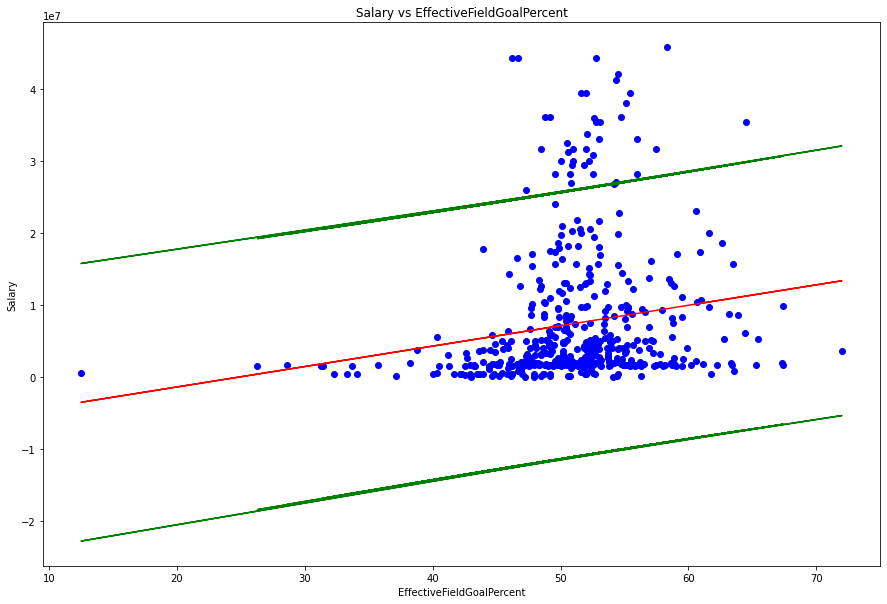

In [37]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(playerSalaryModel4)

plt.scatter(X['EffectiveFieldGoalPercent'], y, color = "blue")
plt.plot(X['EffectiveFieldGoalPercent'], playerSalaryModel4.predict(), color = "red")
plt.plot(X['EffectiveFieldGoalPercent'], iv_l, color = "green")
plt.plot(X['EffectiveFieldGoalPercent'], iv_u, color = "green")
plt.title("Salary vs EffectiveFieldGoalPercent")
plt.xlabel("EffectiveFieldGoalPercent")
plt.ylabel("Salary")
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

Text(0.5, 0, 'Prediction')

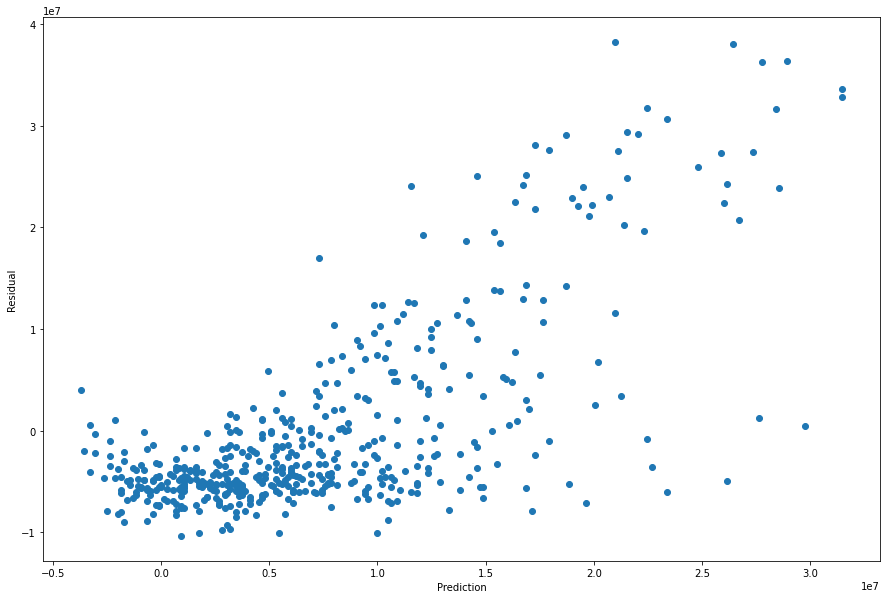

In [36]:
# See the normality of Residual
#Residual Plot
import matplotlib.pyplot as plt
fig = plt.scatter(playerSalaryModel3.predict(), playerSalaryModel4.resid)
fig.axes.set_ylabel('Residual')
fig.axes.set_xlabel('Prediction')